## Тема “Обучение без учителя”

### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
data = boston["data"]
target = boston["target"]
feature_names = boston["feature_names"]

In [4]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
y = pd.DataFrame(target, columns = ["price"])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [6]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 42)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [8]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [9]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

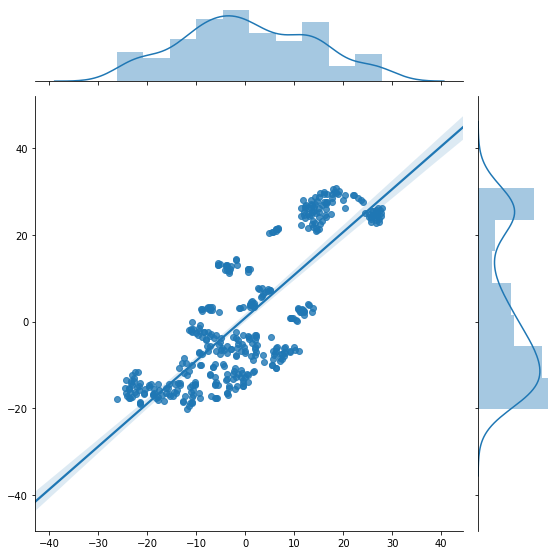

In [10]:
import seaborn as sns
grid = sns.jointplot(X_train_tsne[:, 0], X_train_tsne[:, 1], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах

In [11]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42, max_iter = 100)

In [12]:
train_labels = model.fit_predict(X_train_scaled)

print(train_labels[:30])

[1 2 0 1 2 2 2 0 1 1 2 2 2 1 2 2 2 0 2 0 1 2 0 2 0 2 1 0 2 0]


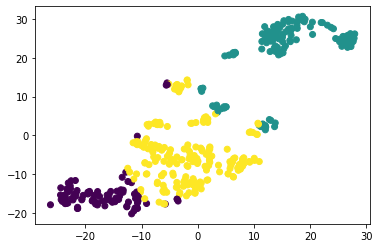

In [13]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)

plt.show()

In [35]:
for n in range(3):
    print(f"Claster {n}: \
          Average CRIM = {X_train.loc[train_labels == n, 'CRIM'].mean():.2f} \
          Average price = {y_train.loc[train_labels == n, 'price'].mean():.2f} \n")

Claster 0:           Average CRIM = 0.07           Average price = 27.79 

Claster 1:           Average CRIM = 10.80           Average price = 16.17 

Claster 2:           Average CRIM = 0.42           Average price = 24.96 



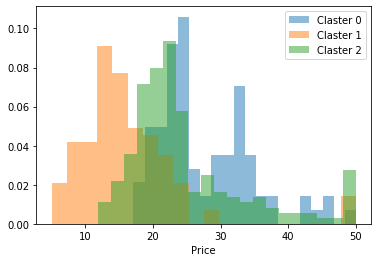

In [34]:
for n in range(3):
    plt.hist(y_train.loc[train_labels == n, 'price'], bins=20, density=True, alpha=0.5)

plt.legend(['Claster 0', 'Claster 1', 'Claster 2'])
plt.xlabel('Price')

plt.show()

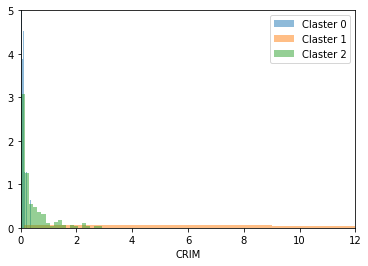

In [16]:
for n in range(3):
    plt.hist(X_train.loc[train_labels == n, 'CRIM'], bins=20, density=True, alpha=0.5)

plt.xlim(0, 12)
plt.ylim(0, 5)
plt.legend(['Claster 0', 'Claster 1', 'Claster 2'])
plt.xlabel('CRIM')

plt.show()

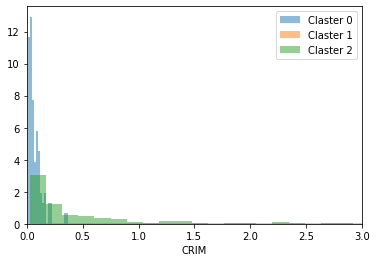

In [17]:
for n in range(3):
    plt.hist(X_train.loc[train_labels == n, 'CRIM'], bins=20, density=True, alpha=0.5)

plt.xlim(0, 3)
plt.legend(['Claster 0', 'Claster 1', 'Claster 2'])
plt.xlabel('CRIM')

plt.show()

### Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [18]:
test_labels = model.predict(X_test_scaled)
test_labels[:30]

array([2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 1, 0, 0,
       2, 2, 1, 1, 2, 1, 2, 2])

In [36]:
for n in range(3):
    print(f"Claster {n}: \
          Average CRIM = {X_test.loc[test_labels == n, 'CRIM'].mean():.2f} \
          Average price = {y_test.loc[test_labels == n, 'price'].mean():.2f} \n")

Claster 0:           Average CRIM = 0.06           Average price = 31.35 

Claster 1:           Average CRIM = 10.17           Average price = 16.44 

Claster 2:           Average CRIM = 0.27           Average price = 21.86 

